In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df=pd.DataFrame({
        'x':[12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
        'y':[ 39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
    })

In [12]:
np.random.seed(200)

In [13]:
k=3
centroids = {}
for i in range(k):
    centroids[i+1] = [np.random.randint(0, 80), np.random.randint(0, 80)]

In [14]:
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

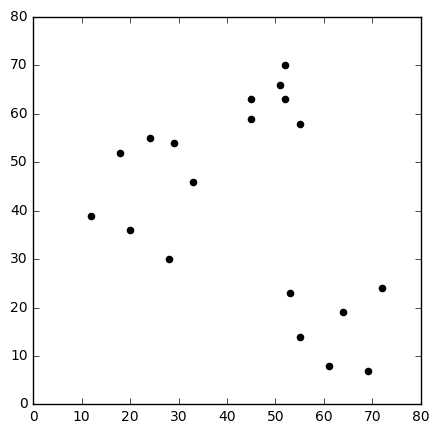

In [15]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')

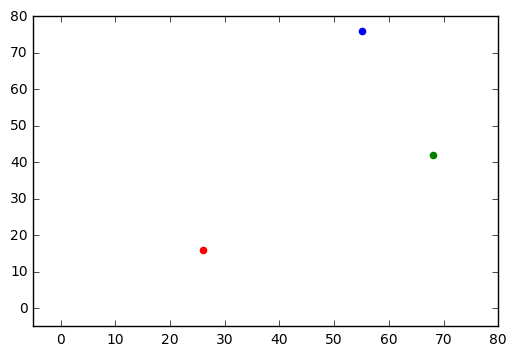

In [16]:
colmap={1: 'r', 2:'g', 3:'b'}
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color=colmap[i])
plt.xlim(-5,80)    
plt.ylim(-5,80)
plt.show()

In [59]:
centroids[1]

[15, 1]

In [17]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=np.sqrt(
        (df['x']-centroids[i][0])**2 + (df['y']-centroids[i][1])**2
          )
        
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df   

In [163]:
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    centroid_distance_cols


['distance_from_1', 'distance_from_2', 'distance_from_3']

In [18]:
df = assignment(df,centroids)
df.loc[:,centroid_distance_cols].idxmin(axis=1)

NameError: name 'centroid_distance_cols' is not defined

In [8]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-5, 80)
plt.ylim(-5, 80)
plt.show()

KeyError: 'color'

In [144]:
np.mean(df[df['closest'] == 1]['x'])

22.5

In [19]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

centroids

{1: [27.666666666666668, 36.166666666666664],
 2: [63.8, 16.2],
 3: [44.125, 61.0]}

(0, 80)

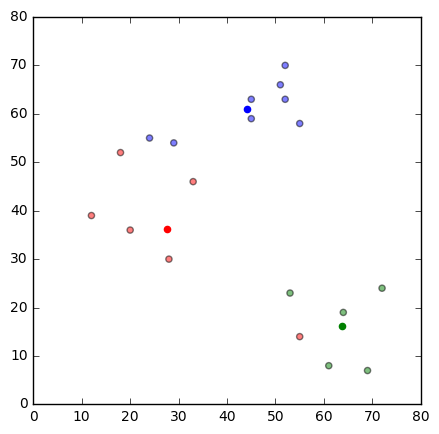

In [20]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)

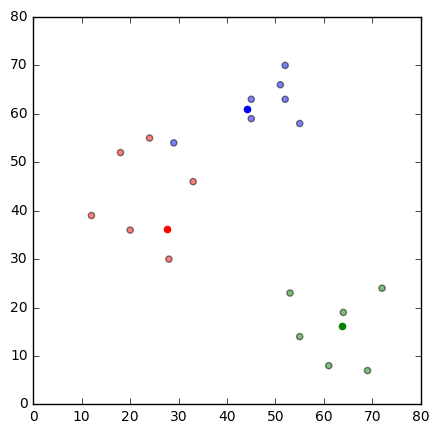

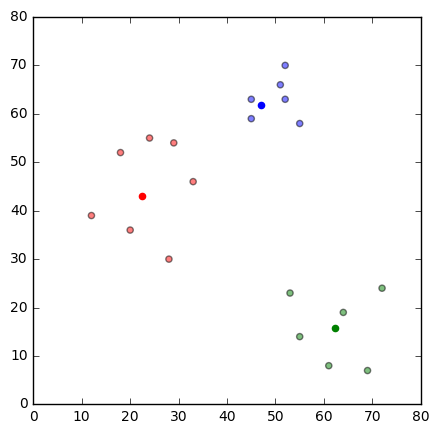

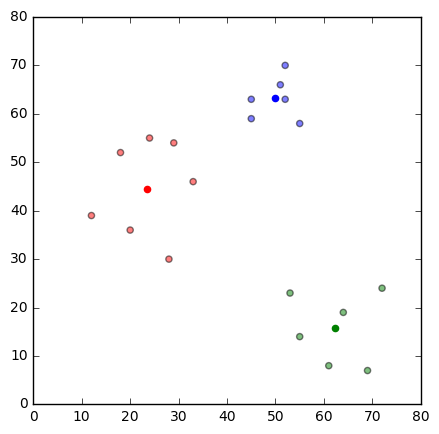

In [21]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df=assignment(df,centroids)
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes()
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    if closest_centroids.equals(df['closest']):
        break

(0, 80)

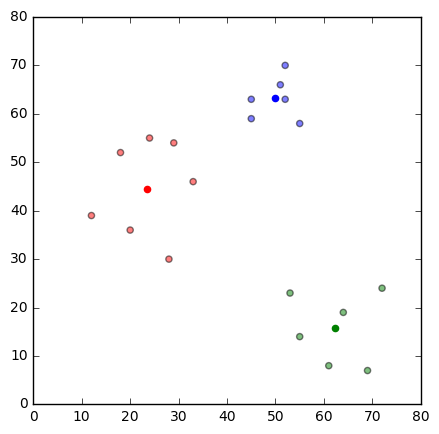

In [168]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)